<a href="https://colab.research.google.com/github/bullbeary-bots/Colabs/blob/main/hidden_markov_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and Import Packages

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# from pyhhmm.gaussian import GaussianHMM
from hmmlearn.hmm import GaussianHMM

### Data Management

In [ ]:
# Data Extraction
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "SPY"
data = yf.download(symbol, start=start_date, end=end_date,
                   multi_level_index=False)
data.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,197.288895,197.805676,196.097663,197.113703,91366500
2017-01-04,198.462570,198.611472,197.612941,197.621695,78744400
2017-01-05,198.304901,198.462571,197.499070,198.191043,78379000
2017-01-06,199.014374,199.487357,197.866927,198.418751,71559900
2017-01-09,198.357452,198.891755,198.322409,198.751607,46939700


In [ ]:
df = data.copy()
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,197.288895,197.805676,196.097663,197.113703,91366500
2017-01-04,198.462570,198.611472,197.612941,197.621695,78744400
2017-01-05,198.304901,198.462571,197.499070,198.191043,78379000
2017-01-06,199.014374,199.487357,197.866927,198.418751,71559900
2017-01-09,198.357452,198.891755,198.322409,198.751607,46939700


In [ ]:
# Add Returns and Range
df['Returns'] = (df.Close / df.Close.shift(1)) - 1
df['Range'] = (df.High / df.Low) - 1
df.dropna(inplace=True)
df.head()

,Close,High,Low,Open,Volume,Returns,Range
Date,,,,,,,
2017-01-04,198.462570,198.611472,197.612941,197.621695,78744400,0.005949,0.005053
2017-01-05,198.304901,198.462571,197.499070,198.191043,78379000,-0.000794,0.004879
2017-01-06,199.014374,199.487357,197.866927,198.418751,71559900,0.003578,0.008189
2017-01-09,198.357452,198.891755,198.322409,198.751607,46939700,-0.003301,0.002871
2017-01-10,198.357452,199.224590,197.963284,198.374961,63771900,0.000000,0.006371


In [ ]:
# Structure Data
X_train = df[['Returns', 'Range']]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000794,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


### HMM Learning

In [ ]:
hmm_model = GaussianHMM(n_components=4, covariance_type="full",
                        n_iter=100).fit(X_train)

print("Model Score: ", hmm_model.score(X_train))

Model Score:  9823.553404941855


In [ ]:
# Check Results
hidden_states = hmm_model.predict(X_train)
hidden_states[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Regime state means for each feature
hmm_model.means_

array([[-0.02499266,  0.04515904],
       [-0.00140989,  0.01788429],
       [ 0.04201374,  0.04963697],
       [ 0.00187556,  0.00678929]])

In [ ]:
# Regime state covars for each feature
hmm_model.covars_

array([[[ 1.35491857e-03,  6.62485222e-05],
        [ 6.62485222e-05,  5.81756085e-04]],

       [[ 2.16646352e-04, -2.69167100e-06],
        [-2.69167100e-06,  8.38677460e-05]],

       [[ 1.53263187e-03,  1.12899592e-03],
        [ 1.12899592e-03,  1.12269167e-03]],

       [[ 3.68147619e-05,  1.39209310e-05],
        [ 1.39209310e-05,  2.04039940e-05]]])

### Data Visualization

In [ ]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []

prices = df.Close.values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))

for s in hidden_states:
  if s == 0:
    labels_0.append(prices[i])
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
  elif s == 1:
    labels_0.append(float('nan'))
    labels_1.append(prices[i])
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
  elif s == 2:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(prices[i])
    labels_3.append(float('nan'))
  elif s == 3:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(prices[i])

  i += 1

Correct number of rows:  True


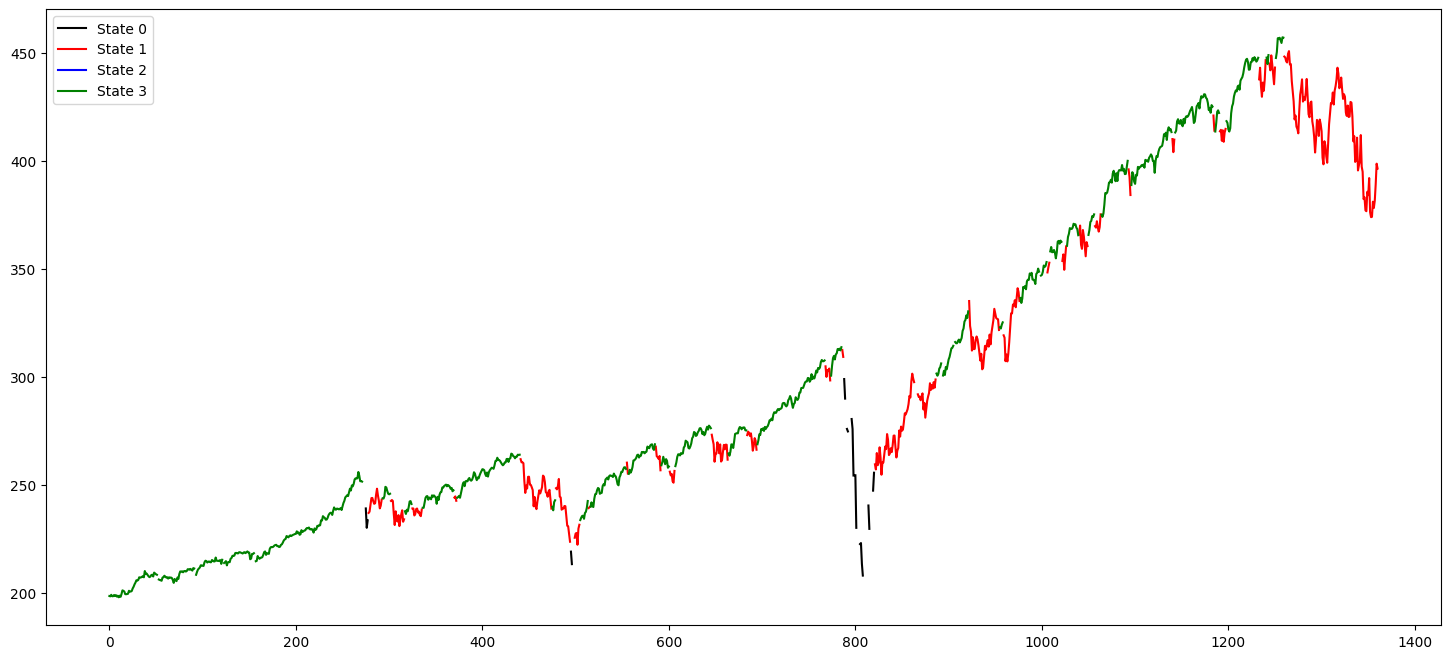

In [ ]:
# Plot Chart
fig = plt.figure(figsize=(18, 8))
plt.plot(labels_0, label='State 0', color='black')
plt.plot(labels_1, label='State 1', color='red')
plt.plot(labels_2, label='State 2', color='blue')
plt.plot(labels_3, label='State 3', color='green')
plt.legend()
plt.show()